<a href="https://colab.research.google.com/github/imrajwardhan/myExercises/blob/master/Flight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 

In [5]:
url='https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv'
df = pd.read_csv(url, index_col = 0)
df.head()


,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


In [6]:
# Different flights
df.name.unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

In [8]:
#No of flights from each carrier
df.name.value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


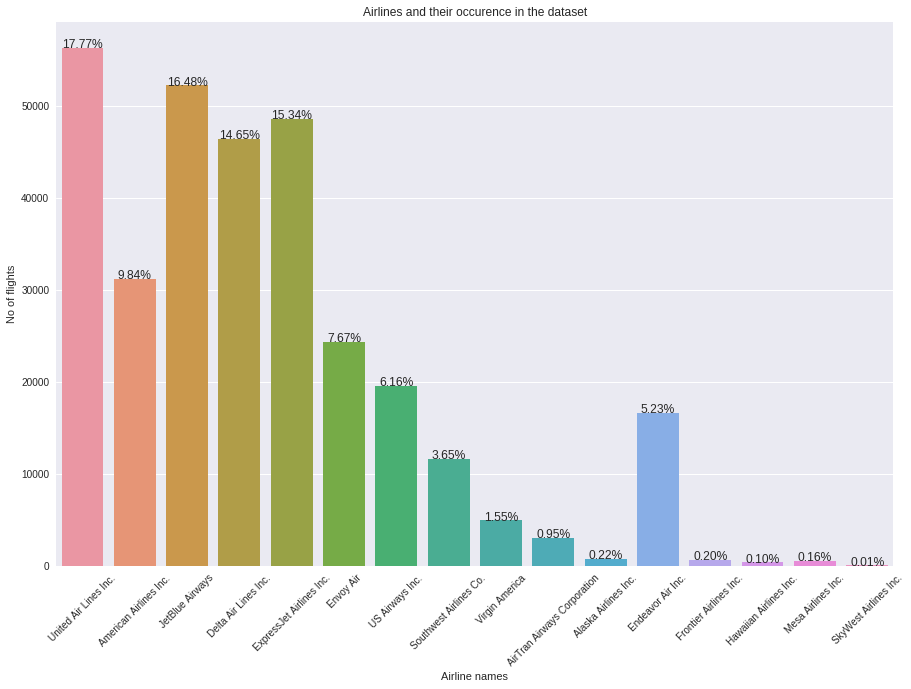

In [10]:
total = float(len(df))
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(df['name'])
plt.xticks(rotation=45)
plt.title("Airlines and their occurence in the dataset")
plt.ylabel("No of flights")
plt.xlabel("Airline names")
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
         height + 4,
         '{0:.2%}'.format((height/total)),
         ha="center")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


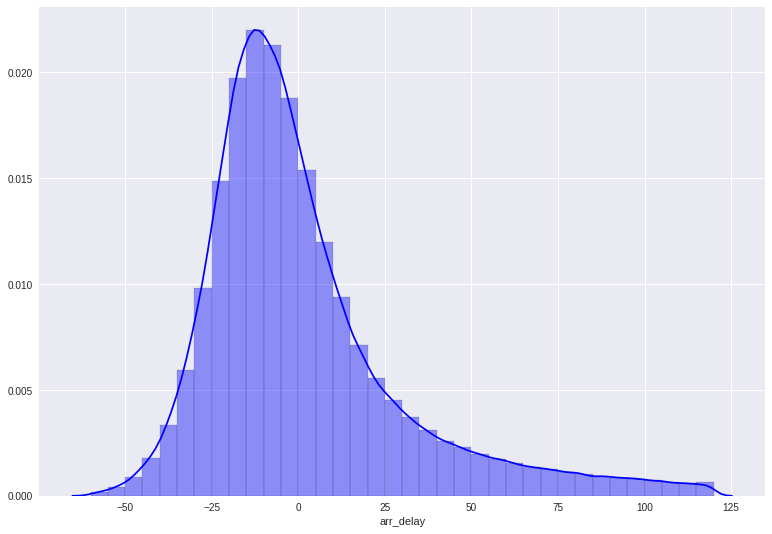

In [0]:
ax, fg = plt.subplots(figsize=(13,9))
sns.distplot(df.arr_delay, hist = True, kde = True, bins=int(180/5), color='blue', hist_kws={'edgecolor':'black'})

In [12]:
on_time = df.loc[df['arr_delay'] <= 0]

no_of_good_arrivals = on_time['name'].value_counts()
total_no_of_arrivals = df['name'].value_counts()
prob_on_time = no_of_good_arrivals/total_no_of_arrivals

prob_on_time

AirTran Airways Corporation    0.423701
Alaska Airlines Inc.           0.741655
American Airlines Inc.         0.680162
Delta Air Lines Inc.           0.671365
Endeavor Air Inc.              0.642418
Envoy Air                      0.548526
ExpressJet Airlines Inc.       0.547295
Frontier Airlines Inc.         0.452269
Hawaiian Airlines Inc.         0.722892
JetBlue Airways                0.581992
Mesa Airlines Inc.             0.557505
SkyWest Airlines Inc.          0.703704
Southwest Airlines Co.         0.581636
US Airways Inc.                0.638410
United Air Lines Inc.          0.629891
Virgin America                 0.680691
Name: name, dtype: float64

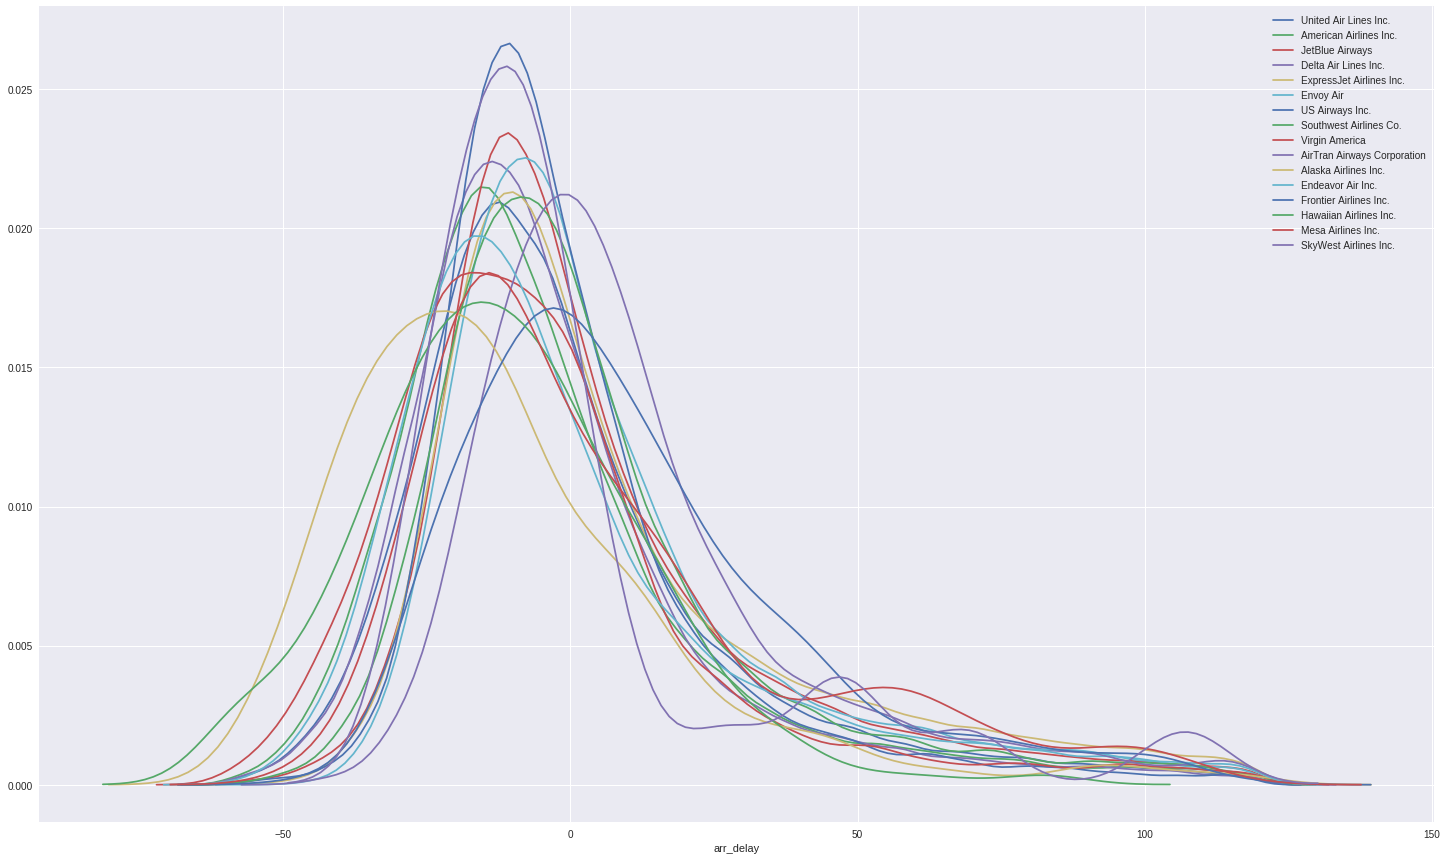

In [0]:
ax, fg = plt.subplots(figsize=(25,15))
for flight in df.name.unique():
  sns.distplot(df[df.name==flight].arr_delay, hist=False, kde=True,label=flight)

In [0]:
looking at the data, we would want alaska airlines or haiiwan airlines

now the test for the central limit theorem the 4 things are:

The sampling dist of the mean will be less spread than the values in the population from which the sample is drawn

The sampling dist will be well-modeled by a normal dist.

The spread of the sampling dist. is related to the spread of the population values $\mu_{sampling} = \mu_{population}$, $\sigma_{sampling} = \frac{\sigma_{population}}{ \sqrt{n}}$

Bigger samples lead to a smaller spread in the sampling dist

In [0]:
# function to generate plots
def sampling_dist_of_mean(sampling_times, sample_size):
  means=[]
  s_d=[]
  for x in range(sampling_times):
    # taking sample
    sample = df.sample(sample_size)
    means.append(sample['arr_delay'].describe()['mean'])
    s_d.append(sample['arr_delay'].describe()['std'])
  
  fig, ax = plt.subplots(figsize=(15,10))
  sns.distplot(means, hist=True, kde = True,
              bins=int(180/5), color='darkblue',
              hist_kws = {'edgecolor':'black'},
              kde_kws = {'linewidth':4},)
  print('Standard deviation of sampling distribution :', np.std(means))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 4.948233527229693


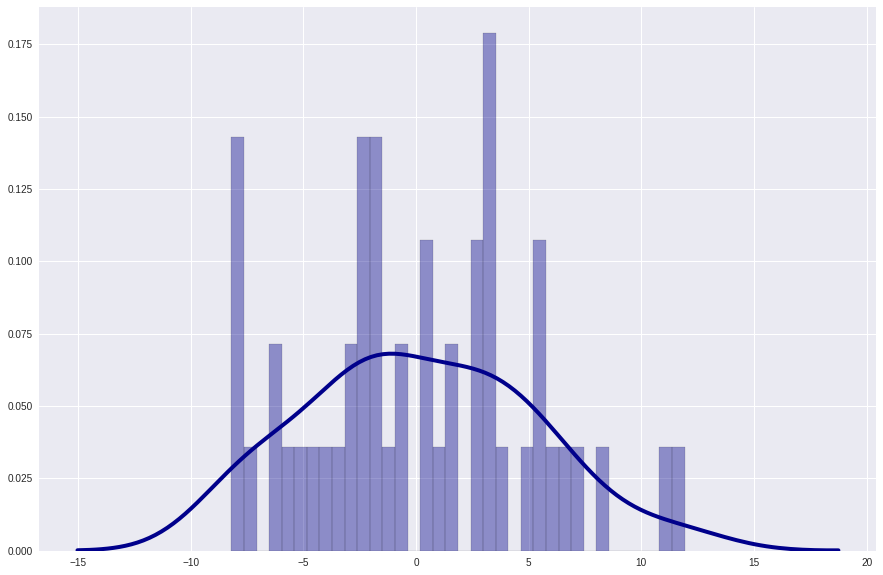

In [21]:
sampling_dist_of_mean(50,25)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 4.2489086233756455


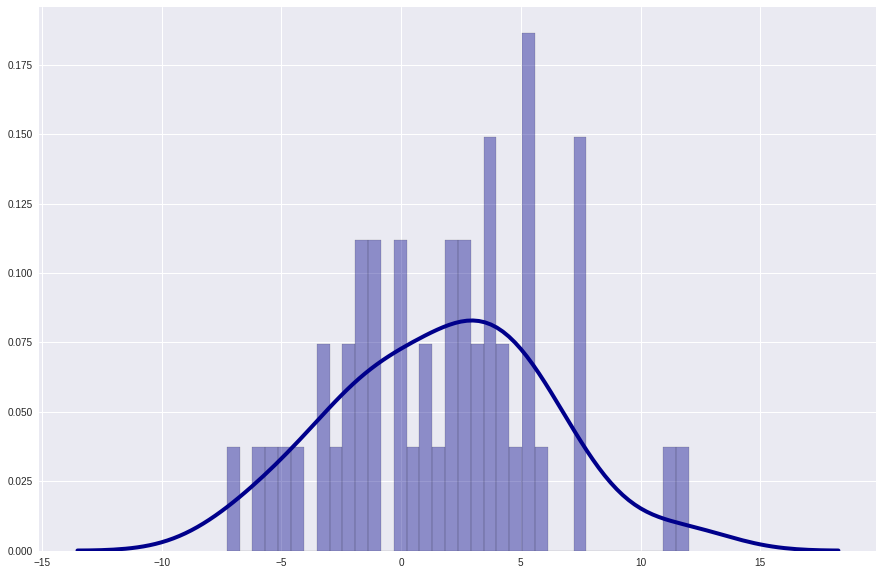

In [22]:
sampling_dist_of_mean(50,35)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 4.5248925909904205


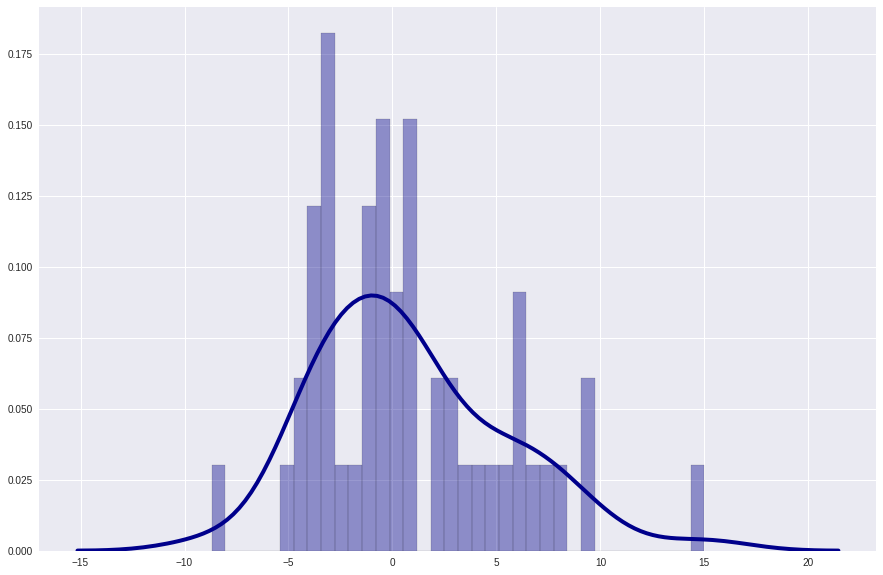

In [23]:
sampling_dist_of_mean(50,50)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 1.976596926467868


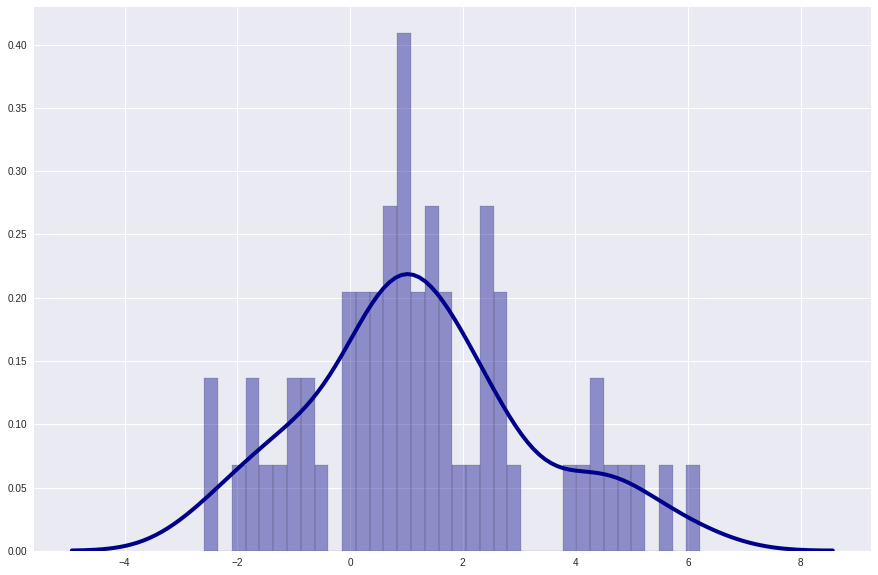

In [25]:
sampling_dist_of_mean(60,200)